# Auszüge aus der Java Klassenbibliothek

#### Marcel Lüthi <br/> Departement Mathematik und Informatik

In diesem Notebook schauen wir uns die Java Klassenbibliothek etwas näher an. Unser Fokus liegt vor allem auf den Collections. Diese Spielen eine grosse Rolle in der modernen Programmierung und werden von beinahe jedem grösseren Programm extensiv genutzt. 

### Agenda

* Collections
* Streams
* Weitere nützliche Pakete.


# Collections

Die Java Collections fassen verschiedene Klassen zusammen, die alle gemeinsam haben, dass sie eine "Ansammlung" von Elementen verwalten. Dies können geordnete Sequenzen wie zum Beispiel Listen sein, oder auch ungeordnete Mengen von Elementen. Dazu gibt es auch Implementation von Queues und Stacks.

### Collections

*Collections* fassen Objekte (Elements) zusammen

* Beispiele:
    * Schulklasse (Gruppe von Schülern)
    * Einkaufsliste (Sammlung von Lebensmitteln)


> Auf Instanzen beliebiger Klassen anwendbar (Generic)

### Wichtigste Collections

![collections](./images/collections.png)

Alle Collection implementieren das Collection interface. In der API Dokumentation sehen wir, dass dieses bereits eine Vielzahl von Methoden zur Verfügung stellt. Diese Methoden haben wir also für alle Collection Klassen zur Verfügung. 

### Methoden von Collections

<a href="https://docs.oracle.com/javase/8/docs/api/index.html?java/util/Collection.html"> <img src="./images/collection-api.png"/></a>

Eine wichtiges Kriterium wenn wir die geeignete Klasse aussuchen ist, ob wir eine geordnete Liste wollen, die auch Duplikate enthalten kann, oder ob wir mit einer ungeordneten Menge im Mathematischen Sinne arbeiten wollen. Je nachdem wählen wir entweder eine Klasse die das ```List``` interface implementiert oder eine die das ```Set``` interface implementiert. 

<div style="float:left;width:50%">

<h2> Interface List </h2>
<ul>
    <li> Geordnet </li>
    <li> Erlaubt Duplikate </li>
</ul>

<h4> Beispiele </h4>

<ul>
    <li> ArrayList </li>
    <li> LinkedList </li>
</ul>
</div>
<div style="float:right;width:50%">

<h2> Interface Set </h2>
<ul>
    <li> Ungeordnet </li>
    <li> Enthält jedes Element nur einmal </li>
</ul>

<h4> Beispiele </h4>

<ul>
    <li> HashSet </li>
    <li> TreeSet </li>
</ul>
</div>

Der Unterschied ist im folgenden Beispiel illustriert. Wenn ein Element mehrfach zur Kollektion hinzugefügt wird, erscheint es in der Liste mehrfach, während es beim Set nur einmal gespeichert wird. Ausserdem entspricht die Reihenfolge in der Liste der Einfügereihenfolge, während die Reihenfolge der Elemente bei der Menge beliebig ist.

### Beispiel: Unterschied List/Set

In [55]:
String[] fruits = {"Banana", "Apple", "Mango", "Apple"};

List<String> fruitList = new ArrayList<>();
Set<String> fruitSet = new HashSet<>();

for (String fruit : fruits) {
    fruitList.add(fruit);
    fruitSet.add(fruit);
}
System.out.println("fruitList: "+ fruitList);
System.out.println("fruitSet: "+ fruitSet);


fruitList: [Banana, Apple, Mango, Apple]
fruitSet: [Apple, Mango, Banana]


Alle Klassen die das Collection interface implementieren, implementieren auch das ```Iterable``` Interface:

### Iterable 

* Alle Java collections implementieren das *Iterable* interface
* Wichtigste Methode: Gibt Iterator zurück

```java
public interface Iterable<T> {

    Iterator<T> iterator();

    ...
}```

Die wichtigste Methode des ```Iterable``` interface ist die Mehtode ```iterator``` welche es uns erlaubt einen Iterator zu erhalten.  Ein Iterator ist eine Klasse, die es uns erlaubt über alle Elemente der Kollektion zu iterieren. 

### Iterator interface

* Sequentielles Durchlaufen einer Kollektion
* Wichtigste Methoden:
    * ```boolean hasNext()```
    * ```T next()```
* Kreieren eines neuen Itearators: ```collection.iterator()``` 

#### Beispiel

In [56]:
Iterator<String> it = fruitList.iterator();
while (it.hasNext()) {
    System.out.println(it.next());
}

Banana
Apple
Mango
Apple


### Iterator form des For loops

> Implementation von ```Iterable``` erlaubt die nutzen der Iterator form des For loops

In [59]:
for (String s : fruitList) {
    System.out.println(s);
}

Banana
Apple
Mango
Apple


Eine weitere nützliche Klasse von Datenstrukturen ist unter dem Interface '''Map''' zusammengefasst. 
Eine ```Map``` bildet eine Menge von *Schlüsseln* auf eine Menge von Werte ab. 

### Maps

Map ist ähnlich wie ```Set```, aber:

* Verlinkt zwei Objekte: *Key* und *Value* (z.B. Produkte mit ihren Preisen)
* Stammt nicht vom Collection Interface ab (z.B. put statt add)
* ```get``` eines Elements via *Key*


### Maps - Hierarchie

![maps](./images/maps.png)

Wie Maps funktionieren wird am einfachsten an einem Beispiel klar. 

### Anwendungsbeispiel Map

In [60]:
Map<String, Double> prices = new HashMap<>();

prices.put("Banana", 1.5);
prices.put("Apple", 1.0);
prices.put("Mango", 2.5);

System.out.println("Price of a Mango " +prices.get("Apple"));

Price of a Mango 1.0


#### Übungen
* Was passiert wenn man einen Schlüssel zweimal (mit unterschiedlichem Wert) einfügt
* Schreiben Sie einen for-loop, der alle Preise ausgibt.
    * Tip: Die Schlüssel erhalten Sie via der Methode ```keySet```
* Wie ändert sich die Ausgabe, wenn Sie eine TreeMap verwenden?

Im Folgenden wollen wir noch anhand eines einfachen Beispiels zeigen, wie man mittels dieser verschiedenen Arten von Kollektionen Sachverhalte der Realen Welt abbilden kann. 

### Kollektionen: Beispiel

* Mögliche Modellierung eines "Früchteladens"

```java
import java.util.*;

class Fruit {
    String name;
}

public class FruitShop {

    Set<Fruit> products = new HashSet<Fruit>();		
    
	Map<Fruit, Double> priceForFruit = new HashMap<Fruit, Double>();

	Queue<Person> customers = new LinkedList<Person>();
}

```

Unser Früchteladen verwaltet eine Menge von Produkten, nämlich die verschiedenen Früchte die zum Verkauf anstehen. Da dieselbe Frucht nicht zweimal vorkommen darf, werden die Früchte in einem ```Set``` verwaltet. Jede Frucht hat einen Preis. Die Verbindung vcn Frucht zum Preis wird via einer ```Map``` erreicht. Die Kunden, die mögliche Produkte kaufen wollen, die werden einer nach dem anderen nach dem Prinzip *first come first serve* bedient. Dies wird über die Klasse ```Queue``` abgebildet. 

# Streams

Als nächstes schauen wir uns die Streams an. Alle Collection Methoden erlauben usn mittles der Methode ```.stream()``` eine Ansicht auf die Kollektion zu erhalten, die es uns ermöglicht mittels Lambda Funktionen die Elemente der Kollektion zu prozessieren. Die wichtigsten drei Operationen auf Streams sind ```map```, ```filter```und ```reduce```, die wir uns im Folgenden anschauen werden. 

### Streams

> Funktionaler Ansatz um Elemente zu prozessieren

* Aus allen Collection kann mit Methode ```stream ``` ein ```Stream``` Objekt erzeugt werden

* Wichtige Methoden
    * ```map``` 
    * ```filter``` 
    * ```reduce``` 
    * ...



### map Methode

Signatur (in Interface ```Stream<T>```)

``` <R> Stream<R>  map(Function<T,R> mapper) ```
 
* Führt Funktion auf jedem Element vom Stream aus 
    * produziert neue Liste    

Die map-Methode haben wir uns schon früher angeschaut. Diese wendet einfach eine übergebene Funktion auf jedes Element im Stream an. Das Resultat ist ein neuer Stream mit den entsprechend Transformierten Elementen. 

### Beispiel: map-Methode

In [62]:
import java.util.stream.Stream;

Stream<String>  newFruitStream = fruitList.stream().map(f -> f.toUpperCase());
newFruitStream.forEach(f -> System.out.println(f));

BANANA
APPLE
MANGO
APPLE


#### Übung: 

* Erzeugen Sie einen Stream von den Zahlen ```1```, ```2``` und ```3```, indem Sie die statische Methode ```of``` von Streams nutzen
* Nutzen Sie die Methode ```map``` um diese in einen ```String``` umzuwandlen. 
* Geben Sie die Elemente des ```Streams``` aus.

In [64]:
import java.util.stream.IntStream;

Stream<String> s = Stream.of(1,2,3).map(n -> Integer.valueOf(n).toString());
s.forEach(f -> System.out.println(f));

1
2
3


Die filter-Methode wendet auf jedes Element ein gegebenes Prädikat an. Wenn das Prädikat für ein gegebenes Element wahr ist, wird dieses in einen neuen Stream geschrieben und ansonsten verworfen. Das Resultat ist ein neuer Stream mit nur den Elementen, für die das Prädikat wahr ist. 

### filter-Methode


Signatur (in Interface ```Stream<T>```)

``` <R> Stream<R>  filter(Predicate<T> filter) ```` 
 
* Gibt Stream mit allen Elementen ```e``` zurück für die gilt ```filter(e) == true```

### Beispiel: filter-Methode

In [65]:
Stream<String> newFruitStream = fruitList.stream().filter(f -> f.contains("n"));
newFruitStream.forEach(f -> System.out.println(f));

Banana
Mango


Die reduce-Methode erlaubt uns die Elemente zusammenzuziehen. Dabei wir jedes Element jeweils einzeln mit dem Resultat der Operation auf den Vorgänger Elementen aufgerufen. 

### reduce-Methode

Signatur (in Interface ```Stream<T>```)

``` <R> Stream<R>  Reduce(T identity, BinaryOperator<T> accumulator) ```

* Zieht Element zusammen, durch ausführen von ```accumulator```
* BinaryOperator ist ```FunctionalInterface``` mit zwei Argumenten vom selben Typ      

Wie ```reduce``` funktioniert lässt sich am besten an einem Beispiel zeigen:

### Beispiel: reduce

In [66]:
import java.util.function.BinaryOperator;

BinaryOperator<String> concat = (s, t) -> s + t;
fruitList.stream().reduce("", concat);

BananaAppleMangoApple

#### Übung

* Schreiben Sie eine Funktion, die alle ungeraden Zahlen filtert, diese verdoppelt und dann aufaddiert.

# Weitere nützliche Pakete

Die Java Bibliothek bietet eine fast grenzenlose Sammlung an nützlichen Funktionen. Hier wollen wir einfach zwei Beispiele vorführen, die zeigen wie einfach man sehr komplexe Dinge bewerkstelligen kann. 

Das erste Beispiel nutzt Funktionalität aus dem Paket ```java.net```, welches Klassen anbietet, welche helfen Daten über ein Netzwerk auszutauschen. In unserem Beispiel zeigen wir, wie einfach wir eine Webseite aus einem Programm lesen können. Dank dem Stream Interface, können wir die Webseite auch mit Lambda Funktionen manipulieren. 


### java.net

> Funktionalität um Netzwerk / Internet Anwendungen zu implementieren

#### Beispiel

In [44]:
import java.net.*;

In [50]:
URL url = new URL("https://news.ycombinator.com");

HttpURLConnection connection = (HttpURLConnection) url.openConnection();
InputStream is = connection.getInputStream();

BufferedReader reader = new BufferedReader(new InputStreamReader(is));
Stream<String> lines = reader.lines();
String response = lines.reduce("", (s,t) -> s + t);


display(response,  "text/html");

<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?s5t26O9UpNwNunslysjS">        <link rel="shortcut icon" href="favicon.ico">          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>              <a href="newest">new</a> | <a href="front">past</a> | <a href="newcomments">comments</a> | <a href="ask">ask</a> | <a href="show">show</a> | <a href="jobs">jobs</a> | <a href="submit">submit</a>            </span></td><td style="text-align:right;padding-right:4px;"><span class="pagetop">                              <a href="login?goto=news">login</a>                          </span></td>              </tr></table></td></tr><tr id="pagespace" title="" style="height:10px"></tr><tr><td><table border="0" cellpadding="0" cellspacing="0" class="itemlist">              <tr class='athing' id='21779810'>      <td align="right" valign="top" class="title"><span class="rank">1.</span></td>      <td valign="top" class="votelinks"><center><a id='up_21779810' href='vote?id=21779810&amp;how=up&amp;goto=news'><div class='votearrow' title='upvote'></div></a></center></td><td class="title"><a href="https://nadiaeghbal.com/phd" class="storylink">Reimagining the PhD</a><span class="sitebit comhead"> (<a href="from?site=nadiaeghbal.com"><span class="sitestr">nadiaeghbal.com</span></a>)</span></td></tr><tr><td colspan="2"></td><td class="subtext">        <span class="score" id="score_21779810">29 points</span> by <a href="user?id=imartin2k" class="hnuser">imartin2k</a> <span class="age"><a href="item?id=21779810">45 minutes ago</a></span> <span id="unv_21779810"></span> | <a href="hide?id=21779810&amp;goto=news">hide</a> | <a href="item?id=21779810">4&nbsp;comments</a>              </td></tr>      <tr class="spacer" style="height:5px"></tr>                <tr class='athing' id='21767954'>      <td align="right" valign="top" class="title"><span class="rank">2.</span></td>      <td valign="top" class="votelinks"><center><a id='up_21767954' href='vote?id=21767954&amp;how=up&amp;goto=news'><div class='votearrow' title='upvote'></div></a></center></td><td class="title"><a href="https://www.fastcompany.com/90440406/the-worlds-first-3d-printed-neighborhood-now-has-its-first-houses" class="storylink">New Story's first 3D-printed houses are now complete</a><span class="sitebit comhead"> (<a href="from?site=fastcompany.com"><span class="sitestr">fastcompany.com</span></a>)</span></td></tr><tr><td colspan="2"></td><td class="subtext">        <span class="score" id="score_21767954">31 points</span> by <a href="user?id=prostoalex" class="hnuser">prostoalex</a> <span class="age"><a href="item?id=21767954">2 hours ago</a></span> <span id="unv_21767954"></span> | <a href="hide?id=21767954&amp;goto=news">hide</a> | <a href="item?id=21767954">11&nbsp;comments</a>              </td></tr>      <tr class="spacer" style="height:5px"></tr>                <tr class='athing' id='21777401'>      <td align="right" valign="top" class="title"><span class="rank">3.</span></td>      <td valign="top" class="votelinks"><center><a id='up_21777401' href='vote?id=21777401&amp;how=up&amp;goto=news'><div class='votearrow' title='upvote'></div></a></center></td><td class="title"><a href="https://github.com/jeremycw/httpserver.h" class="storylink">Httpserver.h: Single header library 

* Übung: Entfernen Sie alle Zeilen, die den string "points" enthalten.

Das nächste Beispiel zeigt ein Beispiel aus dem Paket ```java.text```, welches Funktionalität zum Formatieren von Text zur Verfügung stellt. Als Beispiel zeigen wir, wie man ein Datum textuell aufbereiten kann. 

### java.text

> Länderunabhängiges Formatieren von Text, Datum, Zahlenformaten

#### Beispiel

In [61]:
import java.text.SimpleDateFormat;

Date now = new Date();

SimpleDateFormat format =   new SimpleDateFormat("EEE MMM dd HH:mm:ss:SSS zzz yy");
System.out.println(" 3. " + format.format(now))

 3. Fr. Dez. 13 13:02:31:826 MEZ 19


#### Übung

* Lesen Sie die [Dokumentation](https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html) und ändern Sie das Muster so, dass zusätzlich auch Milisekunden ausgegeben werden

In unserem letzten Beispiel nutzen wir Funktionalität aus den Paketen ```javax.imageio``` und ```java.awt``` um zu zeigen, wie man aus Java Bilder lesen kann. 

### javax.imageio

> Lesen und schreiben von Bildern

#### Beispiel

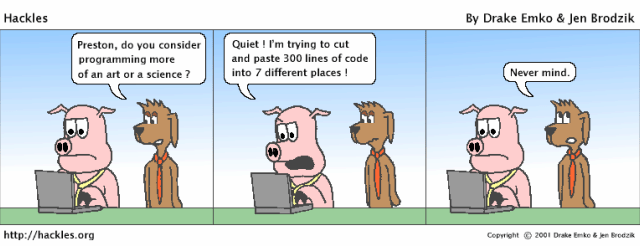

In [53]:
import javax.imageio.ImageIO;
import java.awt.image.BufferedImage;
BufferedImage img = ImageIO.read(new File("./images/cartoon.png"));

img;
